In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
DATA_FILE = 'fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [3]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
learning_rate=0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(init) 
    writer = tf.summary.FileWriter('./log_linear', sess.graph)
    # Step 8: train the model
    for i in range(501): # train the model 100 times
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, rms = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += rms
        if(i %100==0):
            print('Epoch {0:3d}: {1:16.8f}'.format(i, total_loss/n_samples))

    writer.close() 
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])

Epoch   0:    2069.63193340
Epoch 100:    1412.01807167
Epoch 200:    1375.20625799
Epoch 300:    1372.77214521
Epoch 400:    1372.61354301
Epoch 500:    1372.60546845


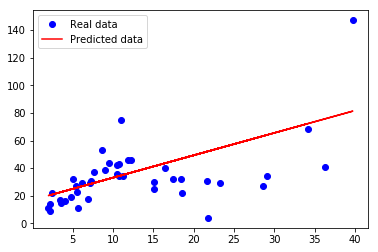

In [5]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()